In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
inputs = my_df.drop(columns=['variety'])
target = my_df.variety
inputs.shape, target.shape

((150, 4), (150,))

In [5]:
#Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (120, 4) (120,)
Testing data sets:  (30, 4) (30,)


In [41]:
# Building support vector machine model
from sklearn.svm import SVC
model = SVC()
#model = SVC(C=1000, gamma='scale', kernel='poly')

In [42]:
# How to find the optimal model hyperparameters

# Define the SVM model
#svm_model = SVC()

# Define the grid of hyperparameters to search
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly'],
#    'gamma': ['scale', 'auto'],
#}

# Perform GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

#print("Best Hyperparameters:", best_params)
# print("Accuracy on Test Set:", accuracy)

In [43]:
#Training the model using training data
model.fit(inputs_train, target_train)

SVC()

In [44]:
model.score(inputs_test, target_test)

1.0

In [45]:
# Finding predicted values from the model
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((30,), (30,))

Model accuracy score:  1.0
Model precision score:  1.0
Model f1 score:  1.0
Model recall score:  1.0


Text(33.22222222222222, 0.5, 'Predicted')

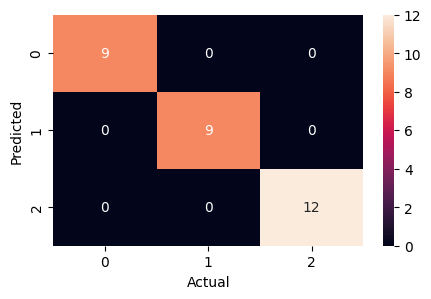

In [46]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
#print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, average='macro'))
#print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")